# Notebook 1: Empirical Relationships
_Bryan Graham - University of California - Berkeley_  

_Ec 240a: Econometrics, Fall 2015_

The purpose of this iPython notebook, and the others which follow, is to concretely illustrate the application of some of the ideas introduced (more abstractly) in lecture. Python is a high-level general purpose computer programming language. It is freely available, and provides a convenient, and widely used, platform for scientific computing. The Anaconda distribution of Python 2.7 provides most of the core libraries we will use this semester and is easy to install (https://store.continuum.io/cshop/anaconda/). 
<br>
<br>
There are many free resources available for learning Python. One, which may be of special interest to economists, can be found at http://quant-econ.net. A good introduction to data manipulation and organization in Python is provided by Wes McKinney in his book _Python for Data Analysis_.  
<br>
<br>
Those components of course problem sets which involve computation should be completed in Python. Any exceptions to this requirement must be cleared with the course GSI. Course time will _not_ be spent teaching Python. It is your responsibility to acquire the necessary coding skills independently outside of class. Your are, of course, free to ask for help from one another (as well as from me and the course GSI during scheduled office hours). I am mindful that students in Ec240a generally have a wide range of prior experiences with technical computing and programming. I ask that those of you with relatively strong backgrounds in these areas assist classmates who are less familiar with programming. I do not expect any of this to be easy, but I do hope that it is fun!
<br>
<br>
Python is one of a number of excellent technical computing environments. For most of my career I have used MATLAB, which I find very natural to code in, and for which many excellent high quality, commercial grade, libraries are available. MATLAB, along with many of its add-on libraries, is available to graduate students through the Econometrics Laboratory. I have also extensively used Mathematica at various times. Berkeley has a site license for this program. Both MATLAB and Mathematica are expensive, which may be a consideration. Another option is R, which is widely used in statistics. If speed is paramount, Julia may be of interest. I do not have much experience with these last two options, both of which, like Python, are free.
<br>
<br>
I strongly advise that you make a serious investment in at least one of these technical computing environments. You may be surprised at how helpful computing skills can be for various research tasks (not just econometrics).
<br>
<br>
Some of you may have prior experience with STATA. STATA is a commerical statistics and data analysis package. While STATA has a tremendous amount of functionality in certain areas, it is not a comprehensive technical computing environment (although the "MATA" part of STATA provides some functionality of this type). I frequently use STATA in my own work, and expect many of you will as well, but if your computation skills are confined to this program you will be limited as a researcher.

## iPython Notebooks
This document is a static rendering (into html) of an iPython notebook. Mathematica, which some of you may be familiar with, also uses a "notebook" environment. Notebooks allow for the integration of text (including LaTex), graphics and code into a single document. They also provide a highly interactive environment for coding. For more complex programming tasks you might find it easier to write, debug and execute code in Spyder (which is included in the Anaconda distribution of Python). This provides a workspace environment similar to MATLAB or RStudio. However, for most of the assignments I will give in Ec240a the notebook approach will be both feasible and attractive.

In [1]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Division of two integers in Python 2.7 does not return a floating point result. The default is to round down 
# to the nearest integer. The following piece of code changes the default.
from __future__ import division

## Loading data
All the calculations in this notebook utilize the  NLSY79\_TeachingExtract.csv file which is available on the course webpage. This file includes variables extracted from multiple waves of the National Longitudinal Survey of Youth (1979). We will load this file into Python as a pandas dataframe. A good introduction to pandas is provided by the book _Python for Data Analysis_.
<br>
<br>
We will call our dataframe 'nlsy79' and use a hierarchical index structure. Rows are indexed by househould id (HHID_79) first, and then within households, by person id (PID_79).

In [3]:
# Directory where NLSY79_TeachingExtract.csv file is located
workdir =  '/Users/bgraham/Dropbox/Teaching/Teaching_Datasets/'

In [4]:
# Read in NLSY79 Extract as a pandas dataframe
nlsy79 = pd.read_csv(workdir+'NLSY79_TeachingExtract.csv') # Reading .csv file as DataFrame

# Hierarchical index: household, then individual; keep indices as columns too
nlsy79.set_index(['HHID_79','PID_79'], drop=False)
nlsy79.rename(columns = {'AFQT_Adj':'AFQT'}, inplace=True) # Renaming AFQT

#Display the first few rows of the dataframe
nlsy79.head()

,PID_79,HHID_79,core_sample,sample_wgts,month_born,year_born,live_with_mom_at_14,live_with_dad_at_14,single_mom_at_14,usborn,...,weeks_worked_2001,weeks_worked_2003,weeks_worked_2005,weeks_worked_2007,weeks_worked_2009,weeks_worked_2011,NORTH_EAST_79,NORTH_CENTRAL_79,SOUTH_79,WEST_79
0,1,1,1,602156.31,9,58,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
1,2,2,1,816100.38,1,59,1,1,0,0,...,0,18,52,52,52,52,1,0,0,0
2,3,3,1,572996.38,8,61,1,0,0,1,...,0,NaN,43,0,NaN,52,1,0,0,0
3,4,3,1,604567.88,8,62,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
4,5,5,1,764753.00,7,59,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0


Our target sample will consist of all male, non-Black, non-Hispanic NLSY respondents. We will also exclude all units in the supplementary military and "poor White" subsamples. Follow-up of these two subsamples was discontinued early on. There are a total of 2,439 respondents in our target sample.

In [5]:
# Only retain non-black, non-hispanic, male NLSY79 respondents belonging to core sample
nlsy79 = nlsy79[(nlsy79.core_sample != 0) & (nlsy79.male != 0) & (nlsy79.black == 0) & (nlsy79.hispanic == 0)]

# Basic summary statistics of nlsy79 dataframe
nlsy79.describe()

,PID_79,HHID_79,core_sample,sample_wgts,month_born,year_born,live_with_mom_at_14,live_with_dad_at_14,single_mom_at_14,usborn,...,weeks_worked_2001,weeks_worked_2003,weeks_worked_2005,weeks_worked_2007,weeks_worked_2009,weeks_worked_2011,NORTH_EAST_79,NORTH_CENTRAL_79,SOUTH_79,WEST_79
count,2439.000000,2439.000000,2439,2439.000000,2439.000000,2439.000000,2434.000000,2434.000000,2434.000000,2438.000000,...,1852.000000,1800.000000,1764.000000,1809.000000,1766.000000,1689.000000,2432.000000,2432.000000,2432.000000,2432.000000
mean,3369.421894,3358.642066,1,541295.481382,6.461255,60.710947,0.946179,0.835661,0.084224,0.972929,...,46.486501,45.612222,45.731859,45.877280,43.137599,43.426288,0.206826,0.369243,0.267681,0.156250
std,2584.723937,2568.438783,0,97904.325138,3.423492,2.215541,0.225710,0.370659,0.277780,0.162325,...,14.298558,15.740095,15.193368,15.186211,17.804726,18.088072,0.405113,0.482699,0.442841,0.363167
min,5.000000,5.000000,1,363376.000000,1.000000,57.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1566.000000,1563.500000,1,473492.500000,3.500000,59.000000,1.000000,1.000000,0.000000,1.000000,...,52.000000,52.000000,52.000000,52.000000,49.000000,52.000000,0.000000,0.000000,0.000000,0.000000
50%,3102.000000,3100.000000,1,528157.000000,7.000000,61.000000,1.000000,1.000000,0.000000,1.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,0.000000,0.000000,0.000000,0.000000
75%,4608.500000,4606.500000,1,592942.000000,9.000000,63.000000,1.000000,1.000000,0.000000,1.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,0.000000,1.000000,1.000000,0.000000
max,12686.000000,12686.000000,1,1000910.400000,12.000000,64.000000,1.000000,1.000000,1.000000,1.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,1.000000,1.000000,1.000000,1.000000


In what follows we will explore the relationship between schooling and earnings as an adult. Our earnings variable will be the average of total annual earnings across the 1997, 1999, 2001 and 2003 calendar years. If earnings are missing for one of those years, the average will be over all non-missing years. NLSY79 respondents were born in the years 1957 to 1964 and hence were between the ages of 36 and 43 in 2000. Current earnings tend to be relatively close to permanent earnings at age 40, which motivates the selection of these calendar years. Earnings are measured in 2010 prices using the CPI-U price index.
<br>
<br>
In turns out that we are only able to measure earnings (and other key variables) for 1,969 of the respondents in our target sample of 2,439; that is for about 81% of target respondents. This missing data is due to a combination of item non-response and attrition. Appropriately addressing complications due to missing data is rather important in practice, but will be ignored here.

In [6]:
# Calculate average earnings across the 1997, 1999, 2001 and 2003 calendar years
# NOTE: This is an average over non-missing earnings values
nlsy79['Earnings'] = nlsy79[["real_earnings_1997", "real_earnings_1999", \
                             "real_earnings_2001", "real_earnings_2003"]].mean(axis=1)

# Only retain complete cases of year of birth, earnings, schooling, AFQT and parental education
nlsy79 = nlsy79[["PID_79","HHID_79","year_born","Earnings","HGC_Age28","AFQT"]] 
nlsy79 = nlsy79.dropna()

# Summary statistics
nlsy79.describe()

,PID_79,HHID_79,year_born,Earnings,HGC_Age28,AFQT
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,3390.276282,3377.005587,60.795835,62401.822450,13.267141,55.286611
std,2544.969459,2524.574219,2.217806,54060.095779,2.483838,28.548731
min,6.000000,5.000000,57.000000,0.000000,5.000000,0.000000
25%,1597.000000,1594.000000,59.000000,30805.881250,12.000000,31.190001
50%,3140.000000,3139.000000,61.000000,49679.392250,12.000000,57.962002
75%,4643.000000,4642.000000,63.000000,75093.113250,16.000000,79.804001
max,12139.000000,12137.000000,64.000000,315153.720000,20.000000,100.000000


Earnings is a continuously-valued variable (or practically so). For what follows it will be convenient to discretize earnings. The following snippet of code creates earnings buckets, in \$5,000 increments from \$0 to \$70,000, in \$10,000 increments from \$70,000 to \$100,000, and in \$50,000 increments from \$100,000 to \$250,000. All individuals with average earnings exceeding \$250,000 are lumped into a single bucket.
<br>
<br>
Schooling _is_ discretely-valued, measured in whole years of completed schooling. However, in order to avoid complications due to sparse and/or empty cells, we will lump all individuals with less than 12 years of schooling (i.e., high school dropouts and less) into a single group.
<br>
<br>
After discretizing schooling and earnings we can compute the joint frequency distribution of schooling and earnings.

In [7]:
# Years-of-Schooling buckets
sch_bkts  = [0, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

# Annual earnings buckets
# NOTE: Buckets defined as monotonically decreasing so that the top row of the schooling/earnings
#       cross-tabulation corresponds to the highest income bracket
earn_bkts = [2500000, 250000, 200000, 150000, 100000, 90000, 80000, 70000, 65000, 60000, 55000, 50000, \
             45000, 40000, 35000, 30000, 25000, 20000, 15000, 10000, 5000, 0]

# Table of counts for each schooling-by-earnings cell with both row and column totals included
# NOTE: np.digitize() returns bin indices with upper bin edges excluded
earn_by_sch = pd.crosstab(np.digitize(nlsy79.Earnings, earn_bkts), np.digitize(nlsy79.HGC_Age28, sch_bkts), \
                          rownames=['Earnings'], colnames=['Schooling'], margins=True)

# Create informative labels for bins and attach them to the cross tabulation 
sch_bin_labels = ['[0,12)', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'Pr(Earn=y)']
earn_bin_labels = ['+250K','[200K,250K)','[150K,200K)','[100K,150K)','[90K,100K)','[80K,90K)','[70K,80K)', \
                   '[65K,70K)','[60K,65K)','[55K,60K)','[50K,55K)','[45K,50K)','[40K,45K)','[35K,40K)','[30K,35K)', \
                   '[25K,30K)','[20K,25K)','[15K,20K)','[10K,15K)','[5K,10K)','[0K,5K)','Pr(Sch=x)']

# Associate bin labels with cross tabulation
earn_by_sch.index = pd.Index(earn_bin_labels, name="Earnings")
earn_by_sch.columns = pd.Index(sch_bin_labels, name="Schooling")

# Print schooling-by-earnings joint frequency distribution (in percentages)
N = len(nlsy79.Earnings)                  # Total number of complete cases
print "Joint Frequency Distribution of Schooling and Earnings, NLSY79"
print ""
print np.round(100*earn_by_sch/N,2)

Joint Frequency Distribution of Schooling and Earnings, NLSY79

Schooling    [0,12)     12    13    14    15     16    17    18    19    20  \
Earnings                                                                      
+250K          0.00   0.20  0.05  0.05  0.15   0.91  0.25  0.36  0.30  0.36   
[200K,250K)    0.00   0.25  0.00  0.05  0.00   0.96  0.10  0.15  0.25  0.05   
[150K,200K)    0.05   0.36  0.15  0.20  0.00   0.91  0.25  0.15  0.05  0.15   
[100K,150K)    0.15   1.47  0.30  0.71  0.46   2.29  0.41  0.61  0.36  0.36   
[90K,100K)     0.00   0.51  0.25  0.25  0.10   1.12  0.15  0.20  0.05  0.05   
[80K,90K)      0.05   1.57  0.46  0.66  0.30   1.07  0.30  0.20  0.10  0.05   
[70K,80K)      0.46   2.44  0.91  0.76  0.56   1.78  0.20  0.30  0.00  0.10   
[65K,70K)      0.15   1.57  0.25  0.51  0.15   0.76  0.10  0.15  0.10  0.05   
[60K,65K)      0.25   2.13  0.56  0.46  0.25   0.71  0.30  0.05  0.10  0.05   
[55K,60K)      0.41   2.54  0.81  0.36  0.30   1.07  0.15  0.20  0.

In inspecting the cross-tabulation we can see that most of the probability mass is concentrated along the diagonal running from low-schooling/low-earnings to high-schooling/high-earnings. However there is some mass is almost all cells. 
<br>
<br>
Inspecting the marginal distribution of schooling (the bottom row of the table), we can see that there are large masses of probability in the schooling distribution at 12 and 16 years (corresponding to high school and college completion respectively). 
<br>
<br>
The marginal distribution of earnings is reported in the right-most column of the table. Less than 3 percent of NLSY79  respondents in our subsample earned more than \$250,000 around 2000. About one half of respondents earned \$50,000 or less.
<br>
<br>
A somewhat more evocative way to report the joint frequency distribution is through a heatmap (with histograms depicting the two marginal distributions). The following snippet of code produces such a figure. In makes use of the seaborn library.
<br>
<br>
The code which follows also computes some basic probabilities and expectations. To do this we need to behave "as if" earnings is a discretely-valued random variable. For this purpose I assume that any individual in a given earnings bin earned the midpoint value of the bin. So I treat all individual in the \$0 to \$5,000 bin as earning \$2,500. I assume that all individuals in the \$250,000 and above bin earn \$350,000 per annum. This number was calibrated by making a Pareto Tail assumption.


Calibrated Pareto scale parameter
4.00557341119

Calibrated average of upper earnings bin
350000.0

Probability of earning less than $50,000
50.5840528187

Probability of earning less than $50,000 and being a high school dropout
10.0558659218

Expected value of earnings
65158.7100051

Expected value of schooling
13.4403250381


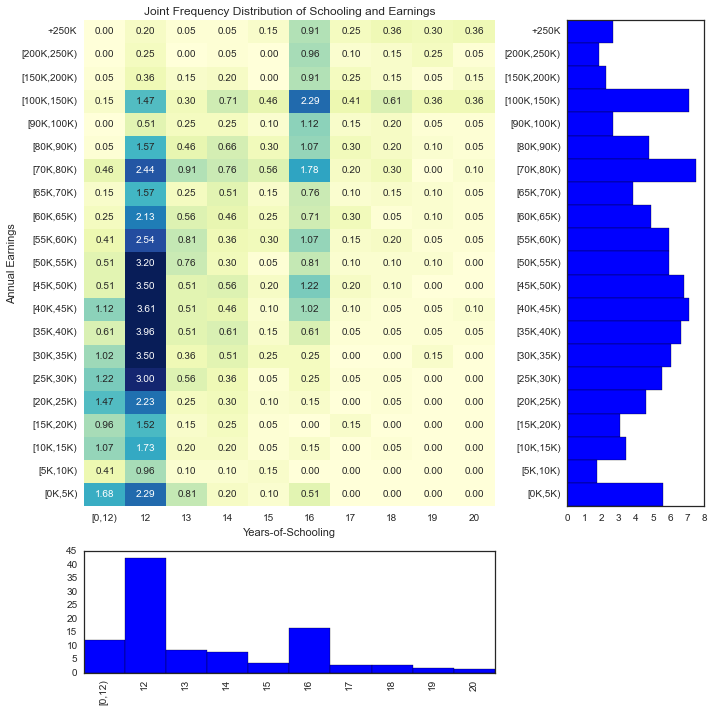

In [8]:
# Convert cross tabulation into a pandas dataframe. 
jfd = pd.DataFrame(100*earn_by_sch/N, index=earn_bin_labels, columns=sch_bin_labels)

# Calculate Pareto shape parameter for upper income bin
shp_num = np.log((np.array(earn_by_sch.loc[['+250K'],['Pr(Earn=y)']]) \
                 + np.array(earn_by_sch.loc[['[200K,250K)'],['Pr(Earn=y)']])) \
                 / np.array(earn_by_sch.loc[['[200K,250K)'],['Pr(Earn=y)']]))
shp_den = np.log(250000/200000)
alpha = shp_num/shp_den

# Attach numeric values to each earnings and schooling bin in order to calculate expectations
earn_lvls = np.array([round(float((alpha/(alpha-1))*250000) / 50000)*50000, 225000, 175000, 125000, 95000, 85000, 75000, \
             67500, 62500, 57500, 52500, 47500, 42500, 37500, 32500, 27500, 22500, 17500, 12500, 7500, 2500])
sch_lvls = np.array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

print ""
print "Calibrated Pareto scale parameter"
print float(alpha)
print ""
print "Calibrated average of upper earnings bin"
print round(float((alpha/(alpha-1))*250000) / 50000)*50000


# Drop row and columns corresponding to margins
jfd = jfd.drop('Pr(Sch=x)', 0)    # Drops schooling margins
jfd = jfd.drop('Pr(Earn=y)', 1)   # Drops earnings margins

# Get marginal distributions of earnings and schooling
mfd_earn = jfd.sum(axis=1)
mfd_sch = jfd.sum(axis=0)

# Calculate some probabilities and expectations
print ""
print "Probability of earning less than $50,000"
print jfd.loc[['[45K,50K)','[40K,45K)','[35K,40K)','[30K,35K)', \
               '[25K,30K)','[20K,25K)','[15K,20K)','[10K,15K)','[5K,10K)','[0K,5K)']].sum(axis=1).sum(axis=0)
print ""
print "Probability of earning less than $50,000 and being a high school dropout"
print jfd.loc[['[45K,50K)','[40K,45K)','[35K,40K)','[30K,35K)', \
               '[25K,30K)','[20K,25K)','[15K,20K)','[10K,15K)','[5K,10K)','[0K,5K)'],['[0,12)']].sum(axis=1).sum(axis=0)
print ""
print "Expected value of earnings"
print np.sum(mfd_earn/100 * earn_lvls)
print ""
print "Expected value of schooling"
print np.sum(mfd_sch/100 * sch_lvls)

# Form a plot with a heatmap of the joint frequency distribution at the center and histograms
# of the two marginal frequency distributions on each side.
import matplotlib.gridspec as gridspec

# Create figure; use gridspec to control relative size of three subplots
jfd_fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[4,1]) 

# Joint frequency distribion
ax0 = plt.subplot(gs[0])
sns.set(style="white")
sns.heatmap(jfd, cmap="YlGnBu", robust=True, annot=True, fmt=".2f", cbar=False)
plt.title('Joint Frequency Distribution of Schooling and Earnings')
plt.xlabel('Years-of-Schooling')
plt.ylabel('Annual Earnings')

# Marginal frequency distribution of earnings
ax1 = plt.subplot(gs[1])
mfd_earn.plot(kind='barh',width=1, facecolor='blue', edgecolor='black').invert_yaxis()
plt.autoscale()

# Marginal frequency distribution of schooling
ax2 = plt.subplot(gs[2])
mfd_sch.plot(kind='bar',width=1, facecolor='blue', edgecolor='black')
plt.autoscale()

# Save result
plt.tight_layout()
plt.savefig(workdir+'Fig_jfd_earn_by_sch.png')

As discussed in lecture, we are often interested in the conditional distribution of one random variable given another.
To get the conditional frequency distribution of earnings given schooling we divide each element of the joint frequency distribution by its column sum.

Conditional Frequency Distribution of Earnings Given Schooling, NLSY79

             [0,12)    12     13    14     15     16     17     18     19  \
+250K          0.00  0.48   0.60  0.65   4.29   5.52   8.77  12.50  17.65   
[200K,250K)    0.00  0.60   0.00  0.65   0.00   5.83   3.51   5.36  14.71   
[150K,200K)    0.42  0.84   1.80  2.58   0.00   5.52   8.77   5.36   2.94   
[100K,150K)    1.26  3.46   3.59  9.03  12.86  13.80  14.04  21.43  20.59   
[90K,100K)     0.00  1.19   2.99  3.23   2.86   6.75   5.26   7.14   2.94   
[80K,90K)      0.42  3.70   5.39  8.39   8.57   6.44  10.53   7.14   5.88   
[70K,80K)      3.78  5.73  10.78  9.68  15.71  10.74   7.02  10.71   0.00   
[65K,70K)      1.26  3.70   2.99  6.45   4.29   4.60   3.51   5.36   5.88   
[60K,65K)      2.10  5.01   6.59  5.81   7.14   4.29  10.53   1.79   5.88   
[55K,60K)      3.36  5.97   9.58  4.52   8.57   6.44   5.26   7.14   2.94   
[50K,55K)      4.20  7.52   8.98  3.87   1.43   4.91   3.51   3.57   5.88   
[45K

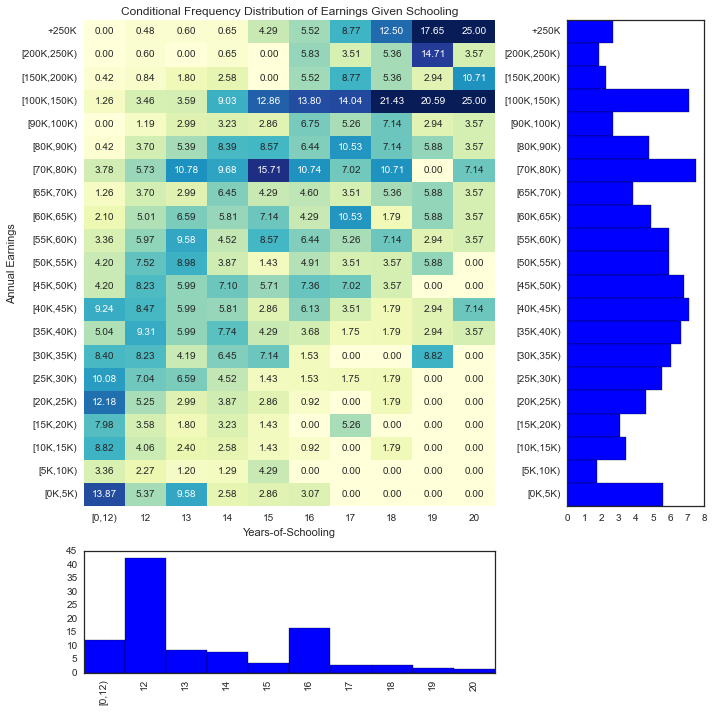

In [9]:
print "Conditional Frequency Distribution of Earnings Given Schooling, NLSY79"
print ""
cfd = (jfd / jfd.sum())*100
print np.round(cfd,2)

# Form a plot with a heatmap of the conditional frequency distribution at the center and histograms
# of the two marginal frequency distributions on each side.

# Create figure; use gridspec to control relative size of three subplots
cfd_fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[4,1]) 

# Conditional frequency distribion
ax0 = plt.subplot(gs[0])
sns.set(style="white")
sns.heatmap(cfd, cmap="YlGnBu", robust=True, annot=True, fmt=".2f", cbar=False)
plt.title('Conditional Frequency Distribution of Earnings Given Schooling')
plt.xlabel('Years-of-Schooling')
plt.ylabel('Annual Earnings')

# Marginal frequency distribution of earnings
ax1 = plt.subplot(gs[1])
mfd_earn.plot(kind='barh',width=1, facecolor='blue', edgecolor='black').invert_yaxis()
plt.autoscale()

# Marginal frequency distribution of schooling
ax2 = plt.subplot(gs[2])
mfd_sch.plot(kind='bar',width=1, facecolor='blue', edgecolor='black')
plt.autoscale()

# Save result
plt.tight_layout()
plt.savefig(workdir+'Fig_cfd_earn_given_sch.png')

## Conditional mean and median regression
The conditional distribution of earnings given schooling is easier to interpret than the corresponding joint one. For example, we observe that while 25 percent of respondents with 20 years of schooling (essentially corresponding to a Ph.D) earned more that $250,000, only 0.5 percent of high school graduates did. The heatmap also clearly shows that the conditional distribution of earnings "shifts to the right" as schooling increases.
<br>
<br>
To get a single "prototypical" measure of earnings for each schooling level, we can use the pandas groupby function to compute mean and median earnings conditional on schooling.

Mean, standard deviation, median and the 0.25 and 0.75 quantiles of earnings for each schooling group

   Schooling           Mean           Std  Mean_plus_1Std  Mean_minus_1Std  \
1     [0,12)   30489.288229  22746.128850    53235.417078      7743.159379   
2         12   47779.384816  34855.144004    82634.528820     12924.240812   
3         13   53079.541548  36652.805192    89732.346740     16426.736357   
4         14   62812.356827  41761.046825   104573.403652     21051.310003   
5         15   70168.221565  52396.663209   122564.884774     17771.558356   
6         16   94875.358839  66723.712227   161599.071067     28151.646612   
7         17  104411.653712  71921.765888   176333.419600     32489.887824   
8         18  115000.059345  75001.057779   190001.117124     39999.001567   
9         19  135211.429165  90332.362230   225543.791396     44879.066935   
10        20  147986.282667  84056.642528   232042.925195     63929.640139   

           Median  0.25 Quantile  0.75

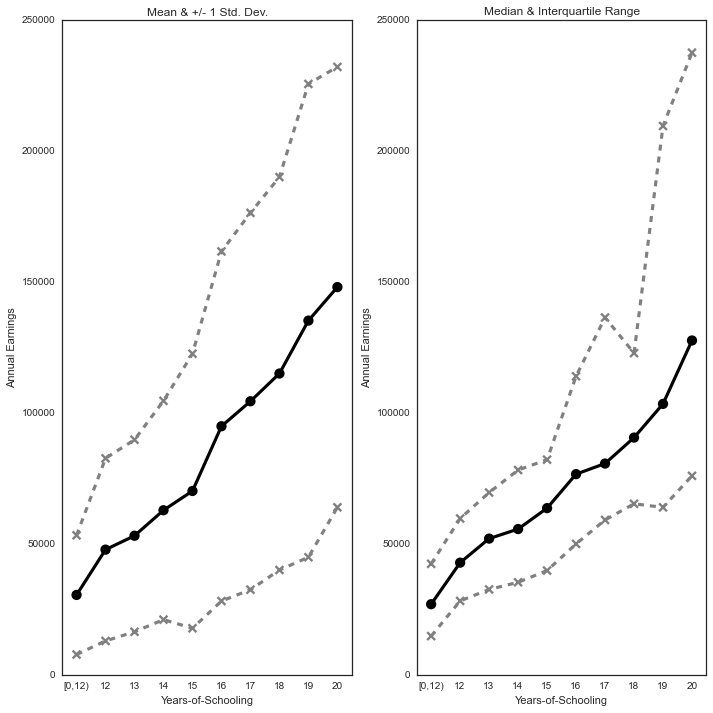

In [10]:
# Assign NLSY respondents to a discrete schooling group
nlsy79['Discrete_Schooling'] = np.digitize(nlsy79.HGC_Age28, sch_bkts)

# Group nlsy79 dataframe by schooling group
grouped_earn = nlsy79['Earnings'].groupby(nlsy79['Discrete_Schooling'])

# Create a dataframe with each row corresponding to a schooling group
regframe = pd.DataFrame({'Schooling': sch_bin_labels[0:10]},index=[1,2,3,4,5,6,7,8,9,10])

# Calculate mean, median and the 0.25 and 0.75 quantiles of earnings for each schooling group
regframe['Mean'] = grouped_earn.mean()
regframe['Std'] = grouped_earn.std()
regframe['Mean_plus_1Std'] = regframe['Mean'] + regframe['Std']
regframe['Mean_minus_1Std'] = regframe['Mean'] - regframe['Std']
regframe['Median'] = grouped_earn.median()
regframe['0.25 Quantile'] = grouped_earn.quantile(q=0.25)
regframe['0.75 Quantile'] = grouped_earn.quantile(q=0.75)

print "Mean, standard deviation, median and the 0.25 and 0.75 quantiles of earnings for each schooling group"
print ""
print regframe

# Plot mean earnings +/- 1 std by schooling group
reg_fig = plt.figure(figsize=(10, 10))
ax1 = reg_fig.add_subplot(1,2,1)
sns.pointplot(x="Schooling", y="Mean", data=regframe, color="black", marker="o")
sns.pointplot(x="Schooling", y="Mean_plus_1Std", data=regframe, color="gray", markers=["x"], linestyles=["--"])
sns.pointplot(x="Schooling", y="Mean_minus_1Std", data=regframe, color="gray", markers=["x"], linestyles=["--"])
plt.title('Mean & +/- 1 Std. Dev.')
plt.xlabel('Years-of-Schooling')
plt.ylabel('Annual Earnings')
plt.ylim([0,250000])

# Plot median earnings and interquartile range of earnings by schooling group
ax2 = reg_fig.add_subplot(1,2,2)
sns.pointplot(x="Schooling", y="0.25 Quantile", data=regframe, color="gray", \
              markers=["x"], linestyles=["--"])
sns.pointplot(x="Schooling", y="Median", data=regframe, color="black")
sns.pointplot(x="Schooling", y="0.75 Quantile", data=regframe, color="gray", \
              markers=["x"], linestyles=["--"])
plt.title('Median & Interquartile Range')
plt.xlabel('Years-of-Schooling')
plt.ylabel('Annual Earnings')
plt.ylim([0,250000])

# Save plot
plt.tight_layout()
plt.savefig(workdir+'Fig_cef_earn_given_sch.png')


We will use this same subsample of NLSY79 respondents in future notebooks. We therefore save select variables in our nlsy79 dataframe to a comma delimited file for future use.

In [11]:
# Extract portion of dataframe to retain
nlsy79 = nlsy79[["PID_79","HHID_79","year_born","Earnings","HGC_Age28","AFQT"]]

# Export estimation subsample to comma delimited file for later use
nlsy79.to_csv(path_or_buf=workdir+'nlsy79.csv')

In [12]:
# This imports an attractive notebook style from Github
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())